In [1]:
import numpy as np
import pandas as pd
import os 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
print(df.shape)
df.isnull().sum()

(205, 26)


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.drop('car_ID', axis=1, inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df['brand'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop('CarName', axis=1, inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [8]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [9]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [10]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [11]:
def number_(x):
    return x.map({'two': 2, 'four': 4})
    
df['doornumber'] = df[['doornumber']].apply(number_)

In [12]:
def convert_number(x):
    return x.map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

df['cylindernumber'] = df[['cylindernumber']].apply(convert_number)

In [13]:
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

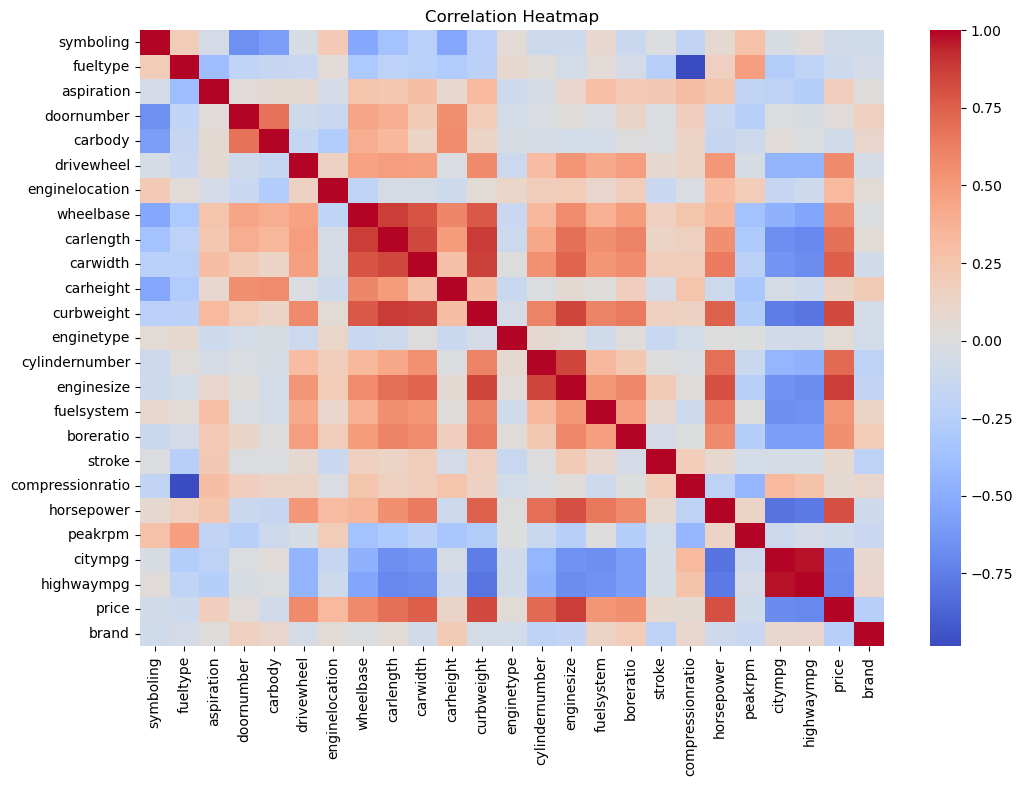

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}
rmse = {}
train_r2 = {}

In [16]:
def eval(model, tag) -> None:
    y_pred = model.predict(X_test)
    results[tag] = r2_score(y_test, y_pred)
    rmse[tag] = np.sqrt(mean_squared_error(y_test, y_pred))
    train_r2[tag] = r2_score(y_train, model.predict(X_train))
    
    print(tag, "Test R^2 Score:", results[tag])
    print(tag, "Train R^2 Score", train_r2[tag])
    print(tag, "RMSE:", rmse[tag])

In [17]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
eval(lr_model, "Linear Regression")

Linear Regression Test R^2 Score: 0.8485436960604089
Linear Regression Train R^2 Score 0.9084646191175562
Linear Regression RMSE: 3457.8272976773815


Random Forest Test R^2 Score: 0.9558733766205677
Random Forest Train R^2 Score 0.9855432382020262
Random Forest RMSE: 1866.4225345335647


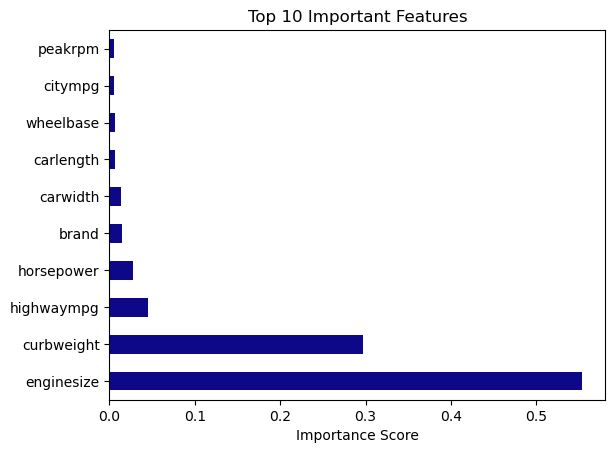

In [18]:
#Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
eval(rf_model, "Random Forest")

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', colormap='plasma')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()

In [19]:
#KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
eval(knn_model, "KNN")

KNN Test R^2 Score: 0.7716421435736786
KNN Train R^2 Score 0.8910591018063454
KNN RMSE: 4245.878870829147


In [20]:
#Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
eval(dt_model, "Decision Tree")

Decision Tree Test R^2 Score: 0.8839113630599653
Decision Tree Train R^2 Score 0.9987687354624712
Decision Tree RMSE: 3027.293143797788


In [21]:
#Bagging
bg_model = BaggingRegressor(estimator=dt_model, n_estimators=100, random_state=42, n_jobs=-1)
bg_model.fit(X_train, y_train)
eval(bg_model, "Bagging")

Bagging Test R^2 Score: 0.9563598999101326
Bagging Train R^2 Score 0.9857372918410678
Bagging RMSE: 1856.1047849420695


In [22]:
#Voting
vt_model = VotingRegressor([
    ("lin", lr_model),
    ("rf", rf_model),
    ("knn", knn_model),
])
vt_model.fit(X_train, y_train)
eval(vt_model, "Voting")

Voting Test R^2 Score: 0.8982518218842637
Voting Train R^2 Score 0.9562776310735731
Voting RMSE: 2834.1507189343015


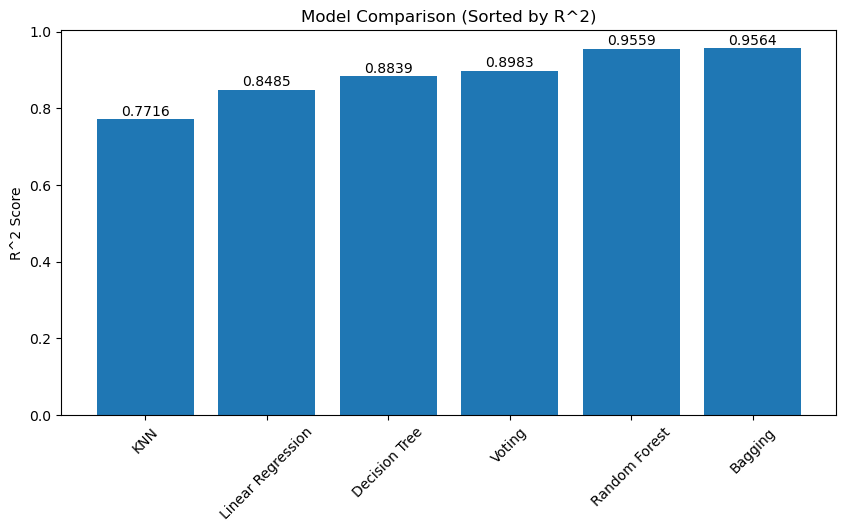

In [23]:
sorted_results = dict(sorted(results.items(), key=lambda x: x[1]))

plt.figure(figsize=(10,5))
plt.bar(sorted_results.keys(), sorted_results.values())
plt.ylabel("R^2 Score")
plt.title("Model Comparison (Sorted by R^2)")
plt.xticks(rotation=45)

for i, v in enumerate(sorted_results.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.show()

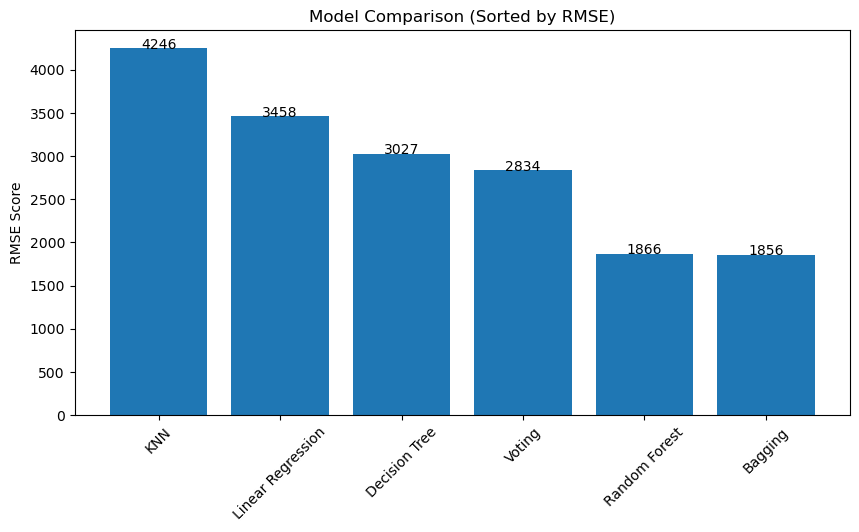

In [24]:
sorted_rmse = dict(sorted(rmse.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,5))
plt.bar(sorted_rmse.keys(), sorted_rmse.values())
plt.ylabel("RMSE Score")
plt.title("Model Comparison (Sorted by RMSE)")
plt.xticks(rotation=45)

for i, v in enumerate(sorted_rmse.values()):
    plt.text(i, v + 0.01, f"{v:.0f}", ha='center')

plt.show()

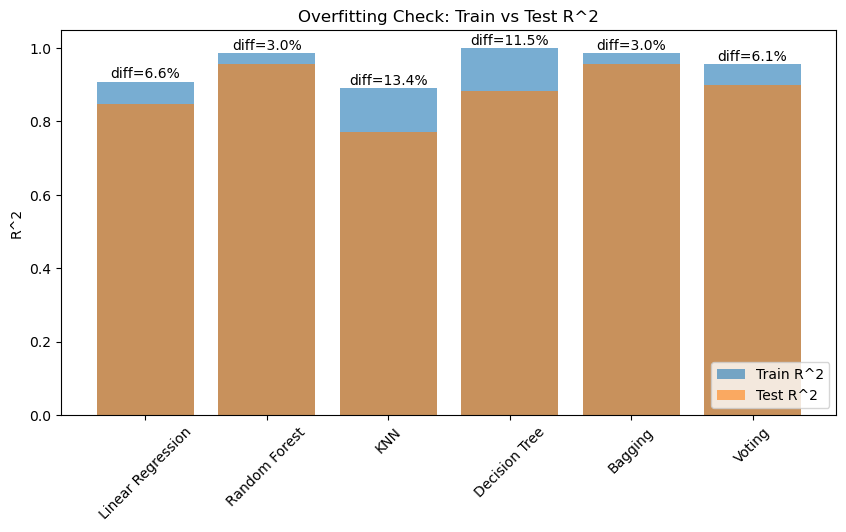

In [25]:
plt.figure(figsize=(10,5))
plt.bar(train_r2.keys(), train_r2.values(), alpha=0.6, label="Train R^2")
plt.bar(results.keys(), results.values(), alpha=0.6, label="Test R^2")
plt.xticks(rotation=45)
plt.ylabel("R^2")
plt.title("Overfitting Check: Train vs Test R^2")
plt.legend(loc="lower right")

for i, name in enumerate(train_r2.keys()):
    train_val = train_r2[name]
    test_val = results[name]
    gap = train_val - test_val
    percent_gap = 100 * gap / abs(train_val)

    y_pos = max(train_val, test_val) + 0.01
    plt.text(i, y_pos, f"diff={percent_gap:.1f}%", ha='center')

plt.show()